In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('1.ushape.xls')
df.rename(columns={'3.159499363321345566e-02': 'X','9.869877579082642072e-01': 'Y','0.000000000000000000e+00': 'class'}, inplace=True)
df.head()

,X,Y,class
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


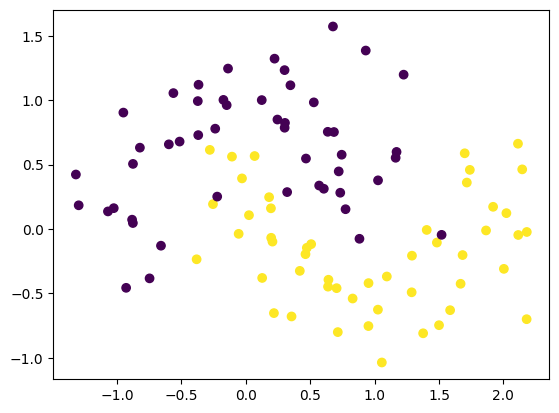

In [3]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [4]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [5]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [6]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2,kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(1,activation='sigmoid'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 371 (1.45 KB)
Trainable params: 371 (1.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
model.get_weights()

[array([[-0.46694165, -0.94429755,  1.6708199 ,  0.09740295, -0.54286706,
          0.09701392, -0.3053322 ,  1.1465069 ,  1.0670136 ,  0.09842939],
        [-0.311088  , -0.40671894,  1.4764079 , -1.1307952 ,  1.0282336 ,
         -0.4068692 , -0.09559669,  1.4850799 ,  1.9420762 ,  0.10660417]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.9743656 ,  0.1461801 , -0.21191747,  0.16033994,  0.7356525 ,
         -0.5366809 , -0.57740176,  0.77467424, -0.20238332,  0.09425941],
        [ 0.14948088,  0.26925525,  0.45038834,  0.22066967,  0.12409642,
          0.55697274, -0.07491098, -0.63223577, -0.00996435,  0.08478027],
        [ 0.8110772 , -0.20904505, -0.05194283, -0.23194897,  0.35985333,
         -0.03605601,  0.44530553, -0.41551697,  0.23705998,  0.23944058],
        [-0.22060803, -0.0687528 ,  0.13314733,  0.05279019,  0.29095525,
          0.3606012 , -0.1575502 ,  0.25953212, -0.5546562 , -0.16510554],
        [ 0.29867

In [8]:
initial_weights = model.get_weights()

In [9]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [10]:
model.set_weights(initial_weights)

In [11]:
model.get_weights()

[array([[-0.1266158 ,  0.1974185 ,  0.6296309 , -0.16621529, -0.6831596 ,
         -0.66081756, -0.50893223,  0.13777684, -0.18018404,  0.13991793],
        [ 0.4572333 ,  0.11200007, -0.2592526 , -0.14145483,  0.5710725 ,
          1.1003876 ,  0.4273389 ,  1.0016586 ,  0.01849346,  0.8144168 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.1806687 ,  0.30204868, -0.2785338 , -0.14525405,  0.18069465,
         -0.00872751, -0.14990453, -0.12157258,  0.11689059,  0.22494368],
        [ 0.11297315, -0.02279578,  0.2733531 , -0.17716874,  0.19492711,
          0.03132202,  0.14975254,  0.13970807,  0.6235175 , -0.21069814],
        [-0.08352587, -0.14885603, -0.59870446, -0.2041303 , -0.11294872,
          0.33520854, -0.11013998, -0.16667047,  0.25412068, -0.12126677],
        [-0.5426798 , -0.51558733,  0.23472801, -0.07773715, -0.04220137,
          0.16542284, -0.20027296, -0.7236137 ,  0.4474574 ,  0.18361898],
        [ 0.28373

In [12]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100


3/3 [==============================] - 2s 131ms/step - loss: 0.6856 - accuracy: 0.4937 - val_loss: 0.6816 - val_accuracy: 0.5500
Epoch 2/100
3/3 [==============================] - 0s 18ms/step - loss: 0.6819 - accuracy: 0.5190 - val_loss: 0.6760 - val_accuracy: 0.5500
Epoch 3/100
3/3 [==============================] - 0s 16ms/step - loss: 0.6783 - accuracy: 0.5190 - val_loss: 0.6702 - val_accuracy: 0.6500
Epoch 4/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6741 - accuracy: 0.5823 - val_loss: 0.6648 - val_accuracy: 0.6500
Epoch 5/100
3/3 [==============================] - 0s 16ms/step - loss: 0.6702 - accuracy: 0.6203 - val_loss: 0.6593 - val_accuracy: 0.7500
Epoch 6/100
3/3 [==============================] - 0s 16ms/step - loss: 0.6668 - accuracy: 0.6962 - val_loss: 0.6534 - val_accuracy: 0.9000
Epoch 7/100
3/3 [==============================] - 0s 24ms/step - loss: 0.6627 - accuracy: 0.7848 - val_loss: 0.6474 - val_accuracy: 0.9000
Epoch 8/100
3/3 [

In [14]:
model.get_weights()

[array([[-0.1166651 ,  0.4313997 ,  0.67098624, -0.34259686, -0.8343046 ,
         -0.40181527, -0.7124542 ,  0.03977951, -0.3889352 ,  0.15699834],
        [ 0.6202866 , -0.05998288, -0.53213084, -0.12208436,  0.61144567,
          1.2487012 ,  0.37293643,  1.1390886 ,  0.01773504,  0.988864  ]],
       dtype=float32),
 array([ 0.08858586,  0.20676121, -0.13869983, -0.02078151, -0.04549825,
         0.08464057, -0.09316227,  0.0245001 ,  0.0010132 ,  0.11470345],
       dtype=float32),
 array([[-0.2740076 ,  0.30204868, -0.10990851, -0.14368546,  0.26924697,
         -0.0809779 , -0.05098983, -0.133053  ,  0.15557437,  0.38084286],
        [-0.05062399, -0.02279578,  0.50447184, -0.23231958,  0.18008916,
          0.14150426,  0.3683334 ,  0.12475622,  0.8605289 , -0.15453084],
        [-0.08352587, -0.14885603, -0.46506995, -0.35002723, -0.20436956,
          0.44199294,  0.12103468, -0.18031037,  0.48900485, -0.23455077],
        [-0.48576578, -0.51558733,  0.46180183, -0.26030383, 

9600/9600 [==============================] - 10s 1ms/step


<Axes: >

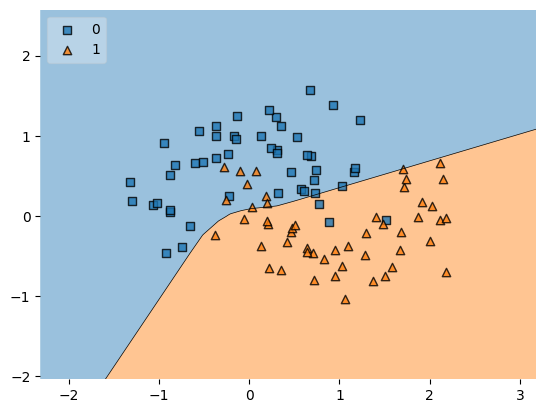

In [15]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

In [16]:
(np.random.randn(10,10)*0.01).min()

-0.023972097083851302

In [17]:
(np.random.randn(10,10)*0.01).max()

0.025374328218746505